In [1]:
from sklearn.datasets import load_files

In [2]:
train_all = load_files('./20news-bydate/20news-bydate-train')        

In [3]:
print(train_all.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [4]:
simple_dataset = load_files('./20news-bydate/20news-bydate-train',
                            categories=['sci.space', 'rec.motorcycles', 'alt.atheism'],
                            encoding='cp1251')

In [5]:
print(simple_dataset.data[0])

From: jlevine@rd.hydro.on.ca (Jody Levine)
Subject: Re: Observation re: helmets
Organization: Ontario Hydro - Research Division
Distribution: usa
Lines: 19

In article <1993Apr15.220511.11311@research.nj.nec.com> behanna@syl.nj.nec.com (Chris BeHanna) writes:
>	Do I have to be the one to say it?
>
>	DON'T BE SO STUPID AS TO LEAVE YOUR HELMET ON THE SEAT WHERE IT CAN
>	FALL DOWN AND GO BOOM!

True enough. I put it on the ground if it's free of spooge, or directly
on my head otherwise.

>	That kind of fall is what the helmet is designed to protect against.

Not exactly. The helmet has a lot less energy if your head isn't in it, and
there's no lump inside to compress the liner against the shell. Is a drop
off the seat enough to crack the shell? I doubt it, but you can always
send it to be inspected.

I've        bike                      like       | Jody Levine  DoD #275 kV
     got a       you can        if you      -PF  | Jody.P.Levine@hydro.on.ca
                         ride it      

In [6]:
print(simple_dataset.data[1])

From: shafer@rigel.dfrf.nasa.gov (Mary Shafer)
Subject: Re: Crazy? or just Imaginitive?
In-Reply-To: nsmca@aurora.alaska.edu's message of Thu, 22 Apr 1993 04:54:03 GMT
Organization: NASA Dryden, Edwards, Cal.
Lines: 25

On Thu, 22 Apr 1993 04:54:03 GMT, nsmca@aurora.alaska.edu said:

nsmca> So some of my ideas are a bit odd, off the wall and such, but
nsmca> so was Wilbur and Orville Wright, and quite a few others..

This is a common misconception.  There was nothing "off the wall"
about the Wright Brothers.  They were in correspondance with a number
of other experimenters (Octave Chanute, Lillienthal, etc), they flew
models, they had a wind tunnel.  In short, they were quite mainstream
and were not regarded as odd or eccentric by the community.

I suggest you read The Bishop's Boys or the biography by Harry Gates?
Combs?  (I can never remember which it is--the guy that had the FBOs
and owned Learjet for a while).  These are both in print and easily
obtainable.  The Bishop's Boys is in

In [7]:
simple_dataset.target

array([1, 2, 1, ..., 2, 1, 1])

In [8]:
print(len(simple_dataset.data))

1671


## TF-IDF

In [9]:
from scipy.spatial.distance import cdist,pdist

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=3, max_df=0.8)

In [11]:
matrix = vectorizer.fit_transform(simple_dataset.data)

In [12]:
matrix.shape

(1671, 10906)

In [13]:
cos_dist = cdist(matrix[0:1].toarray(), matrix.toarray(), metric='cosine')

In [14]:
cos_dist.shape

(1, 1671)

In [15]:
for i in range(50):
    print(simple_dataset.target[i],cos_dist[0][i])

1 0.0
2 0.9554134603488925
1 0.8960332985946793
1 0.9235818083803129
2 0.9502208026371527
1 0.9504205761320622
0 0.9482823094650407
2 0.9656182873404292
1 0.9658967834023467
1 0.9134631457579911
1 0.9208792325712348
0 0.9389141127781679
1 0.953706826162324
1 0.9261097902070701
0 0.9668589039543384
2 0.948498237911466
0 0.9362275414539003
0 0.9707718904640827
2 0.9423298274522862
2 0.8874973213933234
2 0.9440744892006223
2 0.9816244364182471
1 0.9533228081426027
0 0.9030792511038874
1 0.9164643547524615
0 0.9461018114219676
2 0.9637401682434228
2 0.9291917318254523
2 0.9631622182875208
2 0.9592635758386217
0 0.9356990947079464
1 0.942806122746321
2 0.9688847514492526
0 0.9704651435697148
1 0.9877287806932009
2 0.9677848712178979
2 0.9756826863988968
1 0.8420722343988933
1 0.8670330809586415
1 0.9764326478442941
1 0.9515896350357629
2 0.9401378237973799
0 0.9638737948458069
2 0.9349148879644132
0 0.8764658779375483
2 0.990378071582209
1 0.9594679708500332
0 0.9568568629538152
1 0.5639017

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(
                                    matrix,
                                    simple_dataset.target, 
                                    test_size = 0.3, 
                                    random_state = 11)

In [17]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [18]:
predict = knn.predict(X_test)

In [19]:
from sklearn import metrics
metrics.accuracy_score(y_test, predict)

0.950199203187251

In [20]:
changes_min_df = [0 for _ in range(90)]
for i in range(90):
    vectorizer2 = TfidfVectorizer(min_df=(i * 10), max_df=0.8)
    matrix2 = vectorizer2.fit_transform(simple_dataset.data)
    X_train, X_test, y_train, y_test = train_test_split(
                                        matrix2,
                                        simple_dataset.target, 
                                        test_size = 0.3, 
                                        random_state = 11)
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train,y_train)
    changes_min_df[i] = metrics.accuracy_score(y_test, knn.predict(X_test))

In [21]:
import matplotlib.pyplot as plt

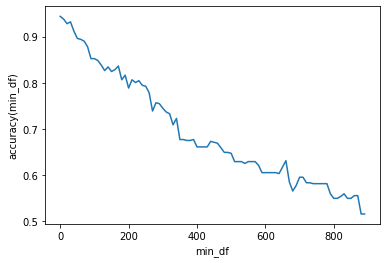

In [22]:
plt.plot(range(0, 900, 10), changes_min_df)
plt.xlabel("min_df")
plt.ylabel("accuracy(min_df)")
plt.show()

In [30]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=1)

In [57]:
vectorizer = TfidfVectorizer(min_df=4, max_df=0.4)
matrix = vectorizer.fit_transform(simple_dataset.data)
matrix.shape

(1671, 8552)

In [58]:
preds = model.fit_predict(matrix.toarray())
print(simple_dataset.target)
print(preds)

[1 2 1 ... 2 1 1]
[0 2 0 ... 2 0 0]


In [64]:
t0, t1, t2 = 0, 0, 0
count = 0
for i in range(len(simple_dataset.target)):
    if preds[i] == simple_dataset.target[i]:
        count += 1
    match preds[i]:
        case 0:
            t0 += 1
        case 1:
            t1 += 1
        case 2:
            t2 += 1
count /= len(simple_dataset.target)
print("Попадание", round(count * 100, 2), "%")
print("Космос", round(t0 / len(simple_dataset.target) * 100, 2), "%")
print("Мотоциклы", round(t1 / len(simple_dataset.target) * 100, 2), "%")
print("Атеизм", round(t2 / len(simple_dataset.target) * 100, 2), "%")

Попадание 54.22 %
Космос 60.08 %
Мотоциклы 6.7 %
Атеизм 33.21 %
